In [1]:
import os
import librosa
import numpy as np
import torch
import torchaudio
import IPython

import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

D:\Apps\Python\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Apps\Python\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Apps\Python\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied t

### Получаем данные

In [2]:
wavfiles = os.listdir("data/wavfiles")
data = pd.read_csv("data/bird_songs_metadata.csv")

### Чистим датасет и преобразуем данные

In [3]:
unique_names = [*sorted(set(data["name"]))]
birds = pd.DataFrame()
for name in unique_names:
    birds = pd.concat([birds, data[data["name"] == name].head(20)])
print(birds["filename"])

2075    564545-0.wav
2076    564545-4.wav
2077    564545-5.wav
2078    564545-6.wav
2079    564545-7.wav
            ...     
3107    561356-0.wav
3108    561356-1.wav
3109    561356-2.wav
3110    561356-3.wav
3111    561356-4.wav
Name: filename, Length: 100, dtype: object


In [5]:
transform = torchaudio.transforms.LFCC()
mels = []
for file in birds["filename"]:
    wave, _ = librosa.load(f"data/wavfiles/{file}")
    mels.append(transform(torch.Tensor(wave)).mean(dim=1))

torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
torch.Size([40])
torch.Size([40, 331])
tor

### Делаем эмбединги

In [5]:
def bird_to_color(name):
    m = {
        "American Robin": "green",
        "Bewick's Wren": "red",
        "Northern Cardinal": "blue",
        "Northern Mockingbird": "orange",
        "Song Sparrow": "grey",
    }
    return m.get(name, "black")

In [6]:
embs = umap.UMAP().fit_transform(torch.stack(mels))
birds["embs"] = [i for i in embs]

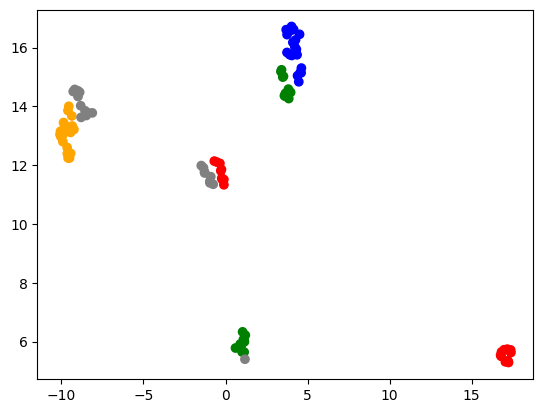

In [7]:
birds["color"] = [*map(bird_to_color, birds["name"])]
plt.scatter(embs[:, 0], embs[:, 1], color=birds["color"])
plt.show()

In [8]:
for color in np.unique(birds["color"]):
    same_color_birds_embs = np.array([emb for emb in birds[birds["color"] == color]["embs"]])
    distances = cdist(same_color_birds_embs, same_color_birds_embs)
    np.fill_diagonal(distances, np.inf)
    index1, index2 = np.unravel_index(np.argmin(distances), distances.shape)
    print(birds.iloc[index1]["filename"], birds.iloc[index2]["filename"])

564544-12.wav 564544-13.wav
564545-9.wav 564545-10.wav
564545-10.wav 564544-3.wav
564545-0.wav 564545-5.wav
564545-5.wav 564545-6.wav


### Примеры звучания похожих птиц

In [9]:
IPython.display.Audio(f"data/wavfiles/564545-11.wav")

In [10]:
IPython.display.Audio(f"data/wavfiles/564544-2.wav")

In [11]:
IPython.display.Audio(f"data/wavfiles/564544-12.wav")

In [12]:
IPython.display.Audio(f"data/wavfiles/564544-13.wav")